In [80]:
!pip install arabic_reshaper


In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import pickle


In [82]:
with open('/content/test.pkl', 'rb') as f:
    test = pickle.load(f)

In [83]:
label_to_class = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}
classes = ['none', 'anger', 'joy', 'sadness', 'love', 'sympathy', 'surprise', 'fear']

In [85]:
from sklearn.metrics import classification_report
import pandas as pd

# Load prediction dataframes
csv_paths = [
    "/content/logestic_regression_predections.csv",
    "/content/nb_examples_new.csv",
    "/content/transformers_pred.csv",
    "/content/gru (1).csv"
]

model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

# Assuming all dataframes have the same "True Label" and "Predicted Label" columns
true_labels = pd.read_csv(csv_paths[0])["True Label"]
predicted_labels_list = [pd.read_csv(csv_path)["Predicted Label"] for csv_path in csv_paths]

# Calculate classification report per model
for idx, predicted_labels in enumerate(predicted_labels_list):
    class_report = classification_report(true_labels, predicted_labels, target_names=classes)  # Replace with your class names

    print(f"Classification Report for {model_names[idx]}:")
    print(class_report)
    print("=" * 20)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        none       0.71      0.79      0.75       200
       anger       0.91      0.88      0.89       188
         joy       0.62      0.56      0.58       205
     sadness       0.78      0.76      0.77       193
        love       0.64      0.89      0.74       229
    sympathy       0.66      0.54      0.60       185
    surprise       0.60      0.42      0.49       154
        fear       0.85      0.83      0.84       156

    accuracy                           0.72      1510
   macro avg       0.72      0.71      0.71      1510
weighted avg       0.72      0.72      0.71      1510

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

        none       0.43      0.56      0.48       200
       anger       0.77      0.53      0.63       188
         joy       0.38      0.28      0.32       205
     sadness       0.49      0.62      0.54   

In [86]:

def make_confusion_matrix(df):
    actual_labels = df["True Label"]
    predicted_labels = df["Predicted Label"]


    unique_labels = np.unique(np.concatenate((actual_labels, predicted_labels)))
    label_mapping = {label: idx for idx, label in enumerate(unique_labels)}

    actual_labels_mapped = np.array([label_mapping[label] for label in actual_labels])
    predicted_labels_mapped = np.array([label_mapping[label] for label in predicted_labels])

    cm = confusion_matrix(actual_labels_mapped, predicted_labels_mapped, labels=list(range(len(unique_labels))))
    return cm

def print_cmatrix(cm)  :
    # Create a heatmap of the confusion matrix using seaborn
    plt.figure(figsize=(7, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


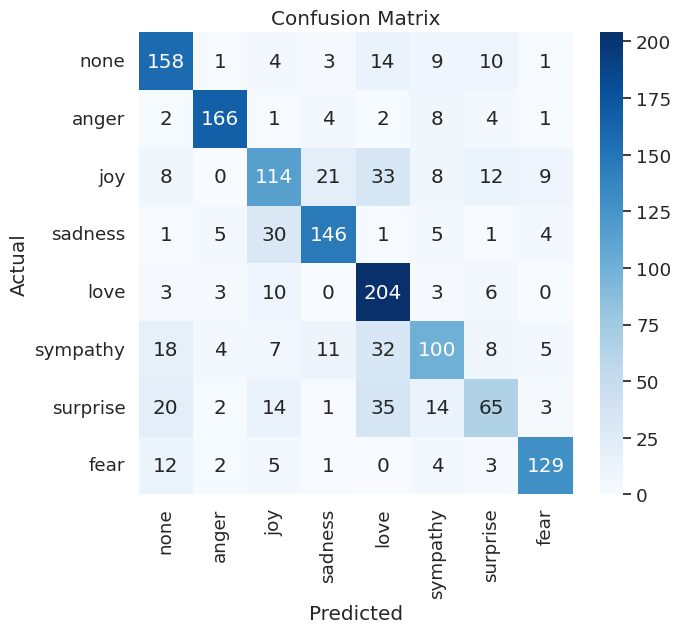

In [87]:
csv_file_path = "/content/logestic_regression_predections.csv"  # Replace with your file path
logestic_reg_df = pd.read_csv(csv_file_path)

# Call the function to print confusion matrix for the DataFrame
logestic_reg_cm=make_confusion_matrix(logestic_reg_df)
print_cmatrix(logestic_reg_cm)

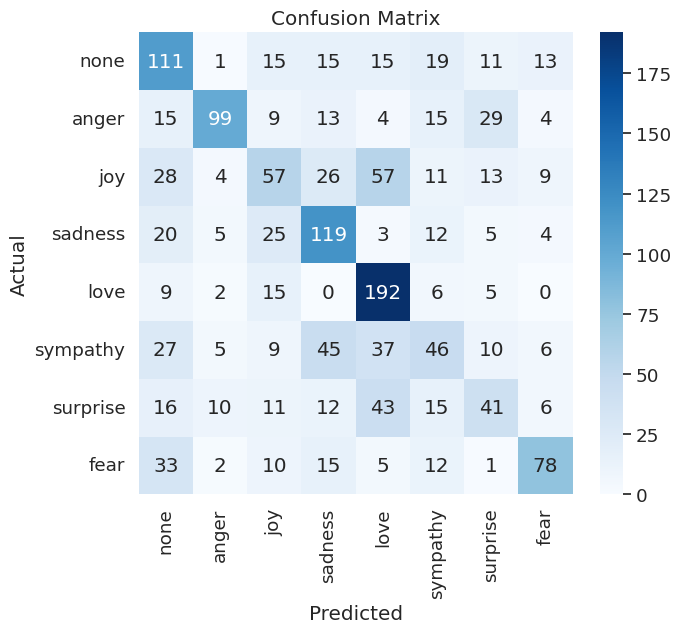

In [88]:
csv_file_path = "/content/nb_examples_new.csv"  # Replace with your file path
nb_df = pd.read_csv(csv_file_path)

# Call the function to print confusion matrix for the DataFrame
nb_cm=make_confusion_matrix(nb_df)
print_cmatrix(nb_cm)

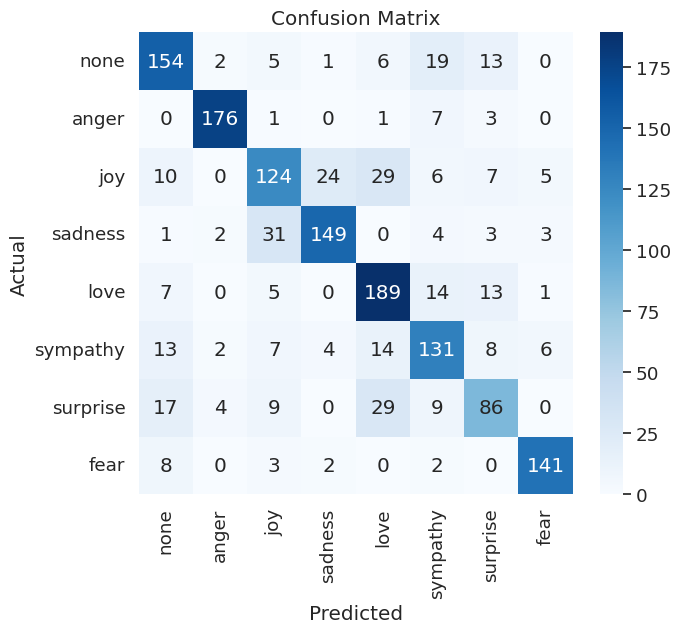

In [89]:
csv_file_path = "/content/transformers_pred.csv"  # Replace with your file path
transformer_df = pd.read_csv(csv_file_path)

# Call the function to print confusion matrix for the DataFrame
transformer_cm=make_confusion_matrix(transformer_df)
print_cmatrix(transformer_cm)

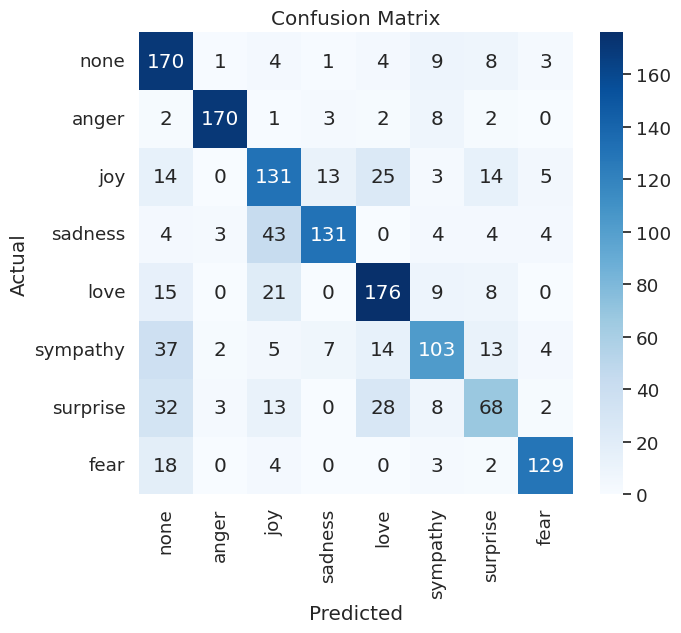

In [90]:
csv_file_path = "/content/gru (1).csv"  # Replace with your file path
gru_df = pd.read_csv(csv_file_path)

# Call the function to print confusion matrix for the DataFrame
gru_cm=make_confusion_matrix(gru_df)
print_cmatrix(gru_cm)

In [91]:
csv_paths = [
    "/content/logestic_regression_predections.csv",
    "/content/nb_examples_new.csv",
    "/content/transformers_pred.csv",
    "/content/gru (1).csv"
]


True Label fear:
  Total Mismatches: 92
  Total Correct Matches: 96
  Total Wrong Matches: 0
True Label anger:
  Total Mismatches: 105
  Total Correct Matches: 92
  Total Wrong Matches: 3
True Label joy:
  Total Mismatches: 138
  Total Correct Matches: 41
  Total Wrong Matches: 26
True Label none:
  Total Mismatches: 89
  Total Correct Matches: 137
  Total Wrong Matches: 3
True Label love:
  Total Mismatches: 92
  Total Correct Matches: 94
  Total Wrong Matches: 7
True Label sadness:
  Total Mismatches: 131
  Total Correct Matches: 36
  Total Wrong Matches: 18
True Label surprise:
  Total Mismatches: 105
  Total Correct Matches: 25
  Total Wrong Matches: 24
True Label sympathy:
  Total Mismatches: 87
  Total Correct Matches: 66
  Total Wrong Matches: 3


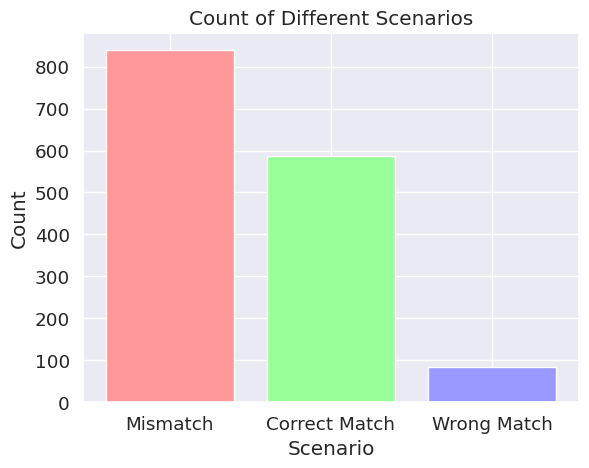

In [92]:
import pandas as pd



model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

# Load the CSV files into DataFrames
data_frames = [pd.read_csv(path) for path in csv_paths]

# Create a DataFrame to store the merged predictions
merged_df = pd.DataFrame()

# Add the true labels
merged_df["True Label"] = data_frames[0]["True Label"]  # Assuming all true labels are the same

# Add predicted labels from each model
for i, model_name in enumerate(model_names):
    merged_df[model_name] = data_frames[i]["Predicted Label"]

# Add a column to indicate if predictions match each other
for i in range(1, len(model_names)):
    col_name = f"Match {model_names[i]}"
    merged_df[col_name] = (merged_df[model_names[i]] == merged_df[model_names[0]]).astype(int)

# Add a column to indicate if all predictions match for each sample
merged_df["All Match"] = merged_df.iloc[:, 3:].all(axis=1).astype(int)

# Initialize dictionaries to store counts
total_matched_samples_correct_per_label = {}
total_matched_samples_wrong_per_label = {}
total_mismatched_per_label = {}


# Count samples that don't match at all per original label
for true_label in merged_df["True Label"].unique():
    mismatched_samples = merged_df[(merged_df["All Match"] == 0) & (merged_df["True Label"] == true_label)]
    total_mismatched_per_label[true_label] = len(mismatched_samples)

for true_label in merged_df["True Label"].unique():
    matched_samples_correct = merged_df[(merged_df["All Match"] == 1) & (merged_df["True Label"] == true_label)& (merged_df["Logistic Regression"] == true_label)]
    total_matched_samples_correct_per_label[true_label] = len(matched_samples_correct)

for true_label in merged_df["True Label"].unique():
    matched_samples_wrong = merged_df[(merged_df["All Match"] == 1) & (merged_df["True Label"] == true_label)& (merged_df["Logistic Regression"] != true_label)]
    total_matched_samples_wrong_per_label[true_label] = len(matched_samples_wrong)
for true_label in total_mismatched_per_label:
    mismatch_count = total_mismatched_per_label[true_label]
    match_correct_count = total_matched_samples_correct_per_label.get(true_label, 0)
    match_wrong_count = total_matched_samples_wrong_per_label.get(true_label, 0)

    print(f"True Label {true_label}:")
    print(f"  Total Mismatches: {mismatch_count}")
    print(f"  Total Correct Matches: {match_correct_count}")
    print(f"  Total Wrong Matches: {match_wrong_count}")



    missmatch = merged_df[(merged_df["All Match"] == 0) ]
    missmatch_number = len(missmatch)

    matched_samples_coorect = merged_df[(merged_df["All Match"] == 1) & (merged_df["True Label"] == merged_df["Logistic Regression"])]
    matched_samples_coorect_num= len(matched_samples_coorect)

    matched_samples_wrong = merged_df[(merged_df["All Match"] == 1) & (merged_df["True Label"] != merged_df["Logistic Regression"])]
    matched_samples_wrong_num= len(matched_samples_wrong)

# Pastel colors
pastel_colors = ['#FF9999', '#99FF99', '#9999FF']

# Creating a bar plot with pastel colors
labels = ['Mismatch', 'Correct Match', 'Wrong Match']
values = [missmatch_number, matched_samples_coorect_num, matched_samples_wrong_num]

plt.bar(labels, values, color=pastel_colors)
plt.xlabel('Scenario')
plt.ylabel('Count')
plt.title('Count of Different Scenarios')
plt.show()

In [93]:
import pandas as pd

# File paths and model names


model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

# Load prediction data into DataFrames
dataframes = [pd.read_csv(path) for path in csv_paths]

# Initialize counters
num_models = len(dataframes)
num_samples = len(dataframes[0])  # Assuming all models have the same number of samples

matching_counts = [[0] * num_models for _ in range(num_models)]
differing_counts = [[0] * num_models for _ in range(num_models)]

# Compare predictions
for i in range(num_models):
    for j in range(i + 1, num_models):
        for sample_idx in range(num_samples):
            pred_i = dataframes[i]["Predicted Label"][sample_idx]
            pred_j = dataframes[j]["Predicted Label"][sample_idx]

            if pred_i == pred_j:
                matching_counts[i][j] += 1
                matching_counts[j][i] += 1
            else:
                differing_counts[i][j] += 1
                differing_counts[j][i] += 1

# Print comparison results
for i in range(num_models):
    for j in range(i + 1, num_models):
        print(f"Comparison between {model_names[i]} and {model_names[j]}:")
        print(f"Matching predictions: {matching_counts[i][j]}")
        print(f"Differing predictions: {differing_counts[i][j]}\n")


Comparison between Logistic Regression and Naive Bayes:
Matching predictions: 857
Differing predictions: 653

Comparison between Logistic Regression and Transformer:
Matching predictions: 1193
Differing predictions: 317

Comparison between Logistic Regression and GRU:
Matching predictions: 1223
Differing predictions: 287

Comparison between Naive Bayes and Transformer:
Matching predictions: 801
Differing predictions: 709

Comparison between Naive Bayes and GRU:
Matching predictions: 808
Differing predictions: 702

Comparison between Transformer and GRU:
Matching predictions: 1202
Differing predictions: 308



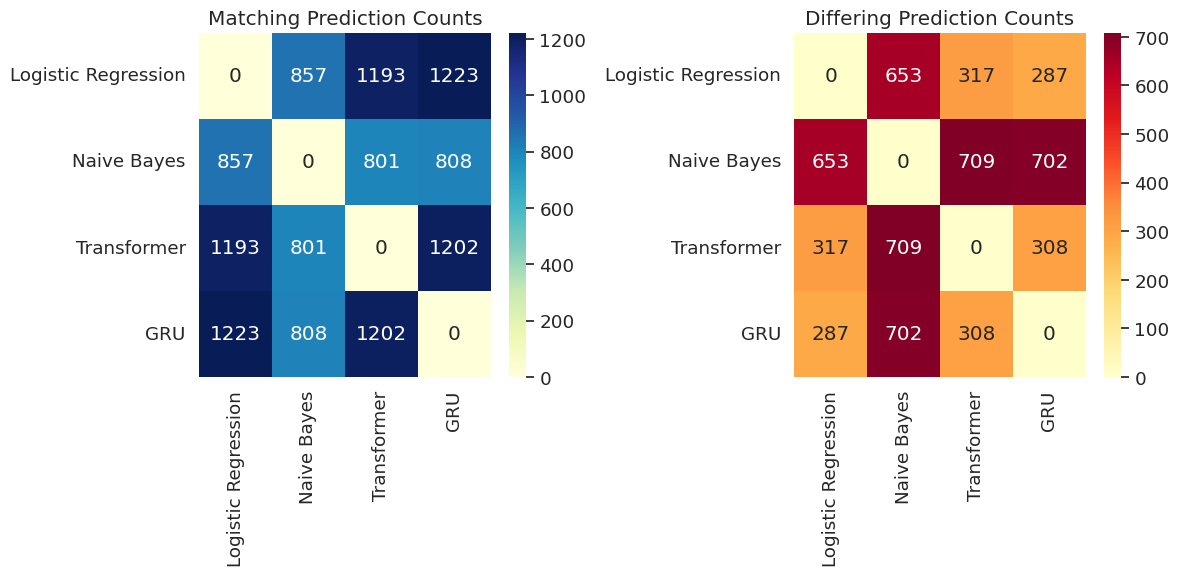

In [94]:

# Create a matrix for matching and differing counts
matching_matrix = [[matching_counts[i][j] for j in range(num_models)] for i in range(num_models)]
differing_matrix = [[differing_counts[i][j] for j in range(num_models)] for i in range(num_models)]

# Convert the matrices to DataFrames for easier plotting
matching_df = pd.DataFrame(matching_matrix, columns=model_names, index=model_names)
differing_df = pd.DataFrame(differing_matrix, columns=model_names, index=model_names)

# Set up the figure and plot
plt.figure(figsize=(12, 6))

# Plot the heatmap for matching counts
plt.subplot(1, 2, 1)
sns.heatmap(matching_df, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Matching Prediction Counts")

# Plot the heatmap for differing counts
plt.subplot(1, 2, 2)
sns.heatmap(differing_df, annot=True, fmt="d", cmap="YlOrRd", cbar=True)
plt.title("Differing Prediction Counts")

plt.tight_layout()
plt.show()

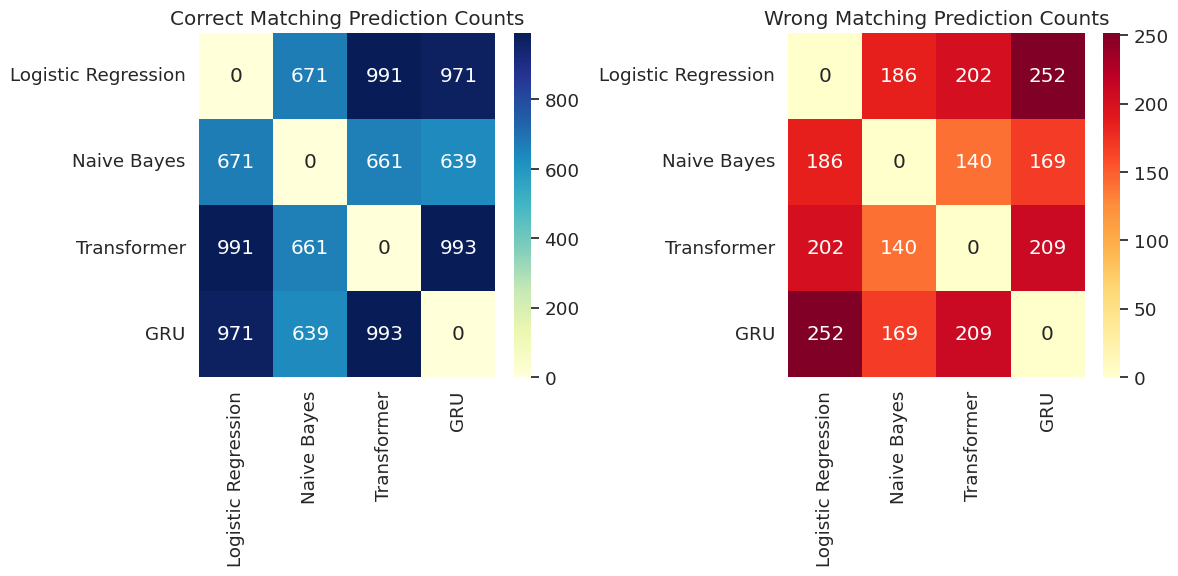

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (same code as before to load dataframes and initialize counters) ...

# Initialize counters for correct and wrong predictions
correct_matching_counts = [[0] * num_models for _ in range(num_models)]
wrong_matching_counts = [[0] * num_models for _ in range(num_models)]

# Compare predictions to true labels
for i in range(num_models):
    for j in range(i + 1, num_models):
        for sample_idx in range(num_samples):
            pred_i = dataframes[i]["Predicted Label"][sample_idx]
            pred_j = dataframes[j]["Predicted Label"][sample_idx]
            true_label = dataframes[i]["True Label"][sample_idx]

            if pred_i == pred_j and pred_i == true_label:
                correct_matching_counts[i][j] += 1
                correct_matching_counts[j][i] += 1
            elif pred_i == pred_j and pred_i != true_label:
                wrong_matching_counts[i][j] += 1
                wrong_matching_counts[j][i] += 1

# Create matrices for correct and wrong matching counts
correct_matching_matrix = [[correct_matching_counts[i][j] for j in range(num_models)] for i in range(num_models)]
wrong_matching_matrix = [[wrong_matching_counts[i][j] for j in range(num_models)] for i in range(num_models)]

# Convert the matrices to DataFrames for plotting
correct_matching_df = pd.DataFrame(correct_matching_matrix, columns=model_names, index=model_names)
wrong_matching_df = pd.DataFrame(wrong_matching_matrix, columns=model_names, index=model_names)

# Set up the figure and plots
plt.figure(figsize=(12, 6))

# Plot the heatmap for correct matching counts
plt.subplot(1, 2, 1)
sns.heatmap(correct_matching_df, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Correct Matching Prediction Counts")

# Plot the heatmap for wrong matching counts
plt.subplot(1, 2, 2)
sns.heatmap(wrong_matching_df, annot=True, fmt="d", cmap="YlOrRd", cbar=True)
plt.title("Wrong Matching Prediction Counts")

plt.tight_layout()
plt.show()


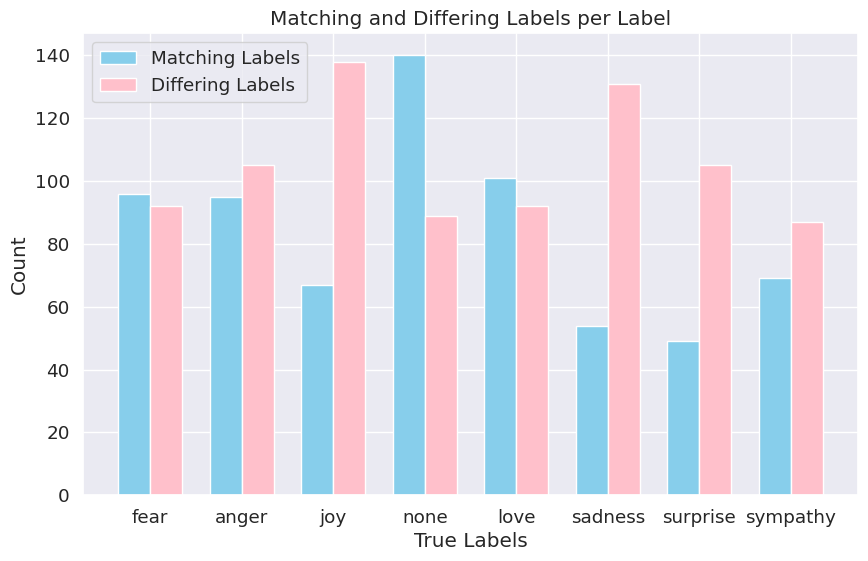

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load prediction dataframes


model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

prediction_dfs = [pd.read_csv(csv_path) for csv_path in csv_paths]

# Assuming all dataframes have the same "True Label" and "Predicted Label" columns
true_labels = prediction_dfs[0]["True Label"]
predicted_labels_list = [df["Predicted Label"] for df in prediction_dfs]

# Find matching and differing predictions
matching_labels = []
differing_labels = []

for idx, true_label in enumerate(true_labels):
    predicted_labels = [pl[idx] for pl in predicted_labels_list]
    if all(label == predicted_labels[0] for label in predicted_labels):
        matching_labels.append((true_label, predicted_labels[0]))
    else:
        differing_labels.append((true_label, predicted_labels))

# Count matching and differing labels per label
match_counts = {label: 0 for label in true_labels.unique()}
diff_counts = {label: 0 for label in true_labels.unique()}

for true_label, _ in matching_labels:
    match_counts[true_label] += 1

for true_label, _ in differing_labels:
    diff_counts[true_label] += 1

# Plotting side by side bars
width = 0.35
x = np.arange(len(true_labels.unique()))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, list(match_counts.values()), width, label='Matching Labels', color='skyblue')
ax.bar(x + width/2, list(diff_counts.values()), width, label='Differing Labels', color='pink')

ax.set_xlabel('True Labels')
ax.set_ylabel('Count')
ax.set_title('Matching and Differing Labels per Label')
ax.set_xticks(x)
ax.set_xticklabels(list(true_labels.unique()))
ax.legend()

plt.show()


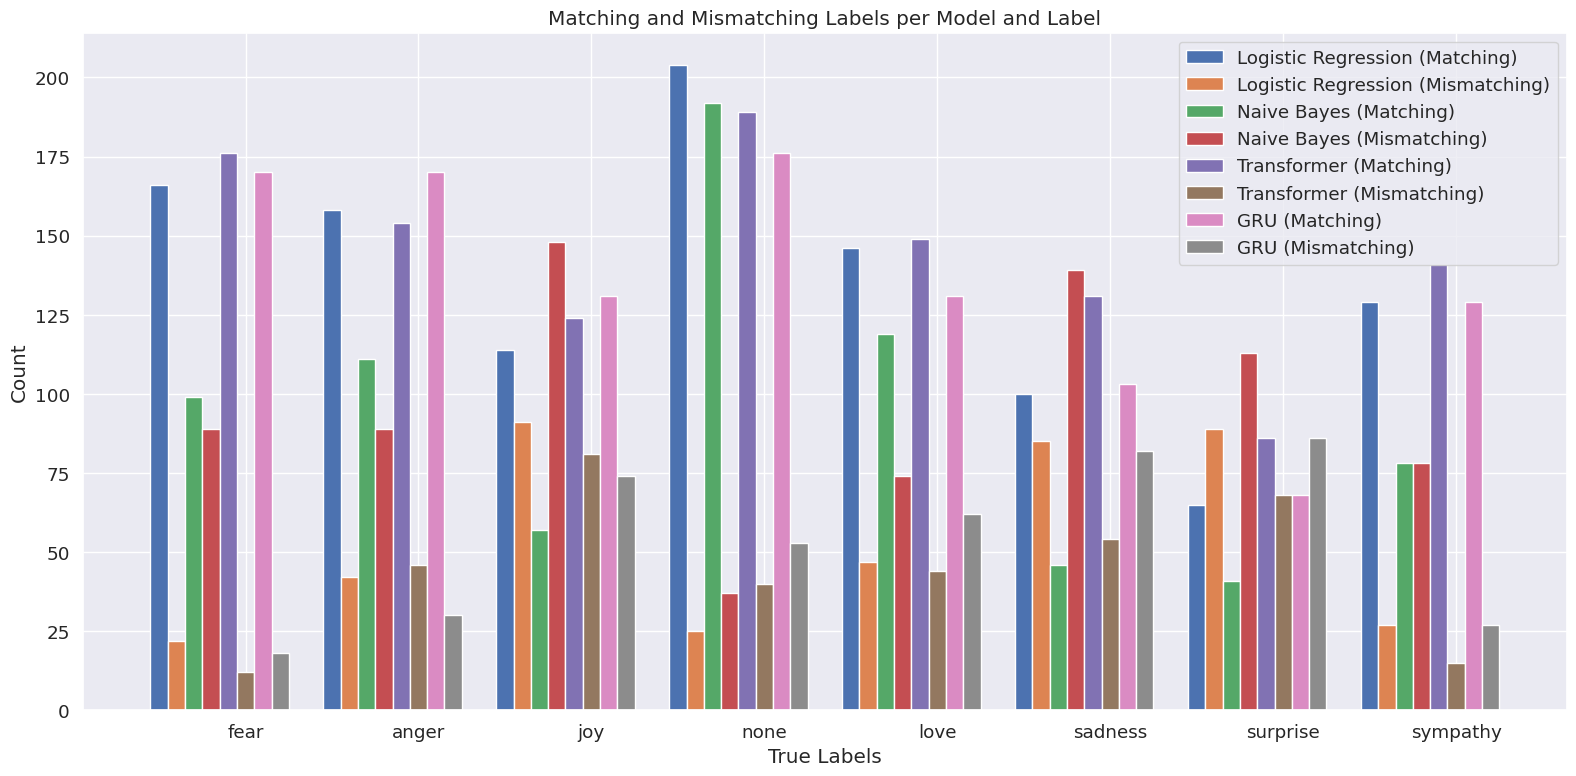

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load prediction dataframes

model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

# Assuming all dataframes have the same "True Label" and "Predicted Label" columns
true_labels = pd.read_csv(csv_paths[0])["True Label"]
predicted_labels_list = [pd.read_csv(csv_path)["Predicted Label"] for csv_path in csv_paths]

matching_counts = []
mismatching_counts = []

# Calculate matching and mismatching counts per label and model
for predicted_labels in predicted_labels_list:
    matching_per_label = {}
    mismatching_per_label = {}

    for true_label, predicted_label in zip(true_labels, predicted_labels):
        if true_label == predicted_label:
            matching_per_label[true_label] = matching_per_label.get(true_label, 0) + 1
        else:
            mismatching_per_label[true_label] = mismatching_per_label.get(true_label, 0) + 1

    matching_counts.append([matching_per_label.get(label, 0) for label in true_labels.unique()])
    mismatching_counts.append([mismatching_per_label.get(label, 0) for label in true_labels.unique()])

# Plotting grouped bars
x = np.arange(len(true_labels.unique()))
total_width = 0.8  # Total width for all bars
bar_width = total_width / len(model_names) / 2  # Width per model (super thin)

fig, ax = plt.subplots(figsize=(16, 8))

for idx, model_name in enumerate(model_names):
    model_offset = (idx - len(model_names) / 2) * bar_width * 2
    ax.bar(x + model_offset, matching_counts[idx], bar_width, label=f"{model_name} (Matching)")
    ax.bar(x + model_offset + bar_width, mismatching_counts[idx], bar_width, label=f"{model_name} (Mismatching)")

ax.set_xlabel('True Labels')
ax.set_ylabel('Count')
ax.set_title('Matching and Mismatching Labels per Model and Label')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(list(true_labels.unique()))
ax.legend()

plt.tight_layout()
plt.show()


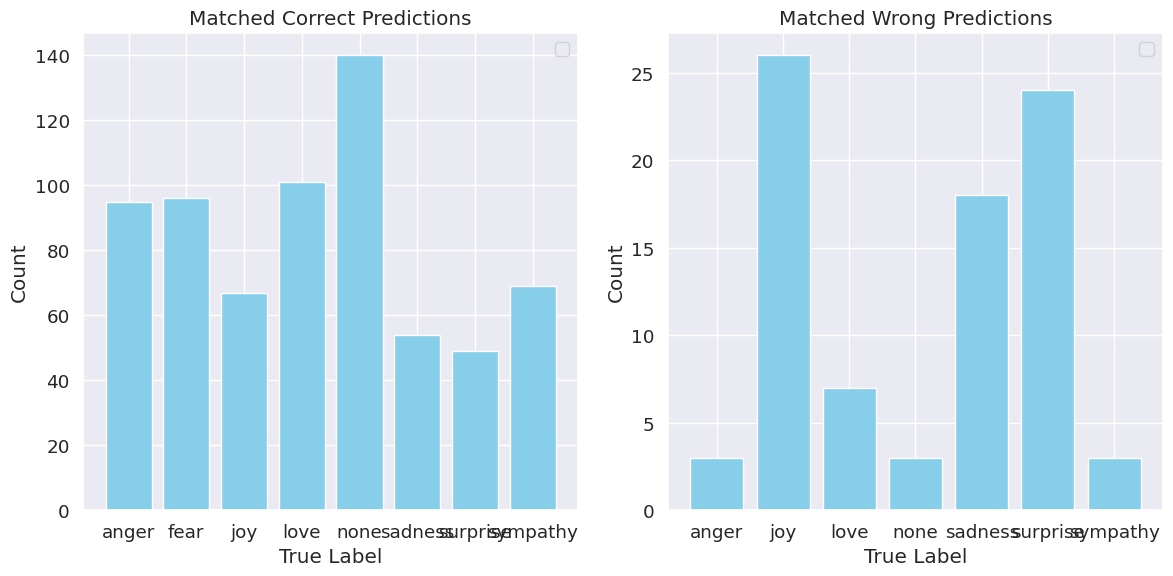

In [98]:
import pandas as pd
import matplotlib.pyplot as plt



model_names = ["Logistic Regression", "Naive Bayes", "Transformer", "GRU"]

# Load the CSV files into DataFrames
data_frames = [pd.read_csv(path) for path in csv_paths]

# Create a DataFrame to store the merged predictions
merged_df = pd.DataFrame()

# Add the true labels
merged_df["True Label"] = data_frames[0]["True Label"]  # Assuming all true labels are the same

# Add predicted labels from each model
for i, model_name in enumerate(model_names):
    merged_df[model_name] = data_frames[i]["Predicted Label"]

# Add a column to indicate if predictions match each other
for i in range(1, len(model_names)):
    col_name = f"Match {model_names[i]}"
    merged_df[col_name] = (merged_df[model_names[i]] == merged_df[model_names[0]]).astype(int)

# Add a column to indicate if all predictions match for each sample
merged_df["All Match"] = merged_df.iloc[:, 3:].all(axis=1).astype(int)

# Compare matched predictions with true label and count matches and mismatches
matched_samples = merged_df[merged_df["All Match"] == 1]
match_counts = matched_samples.groupby(["True Label"]).size()
mismatch_counts = matched_samples[matched_samples["True Label"] != matched_samples[model_names[0]]].groupby(["True Label"]).size()

# Create subplots for matched and mismatched counts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot matched counts
ax1.bar(match_counts.index, match_counts.values, color="skyblue")
ax1.set_xlabel("True Label")
ax1.set_ylabel("Count")
ax1.set_title("Matched Correct Predictions")
ax1.legend()

# Plot mismatched counts
ax2.bar(mismatch_counts.index, mismatch_counts.values, color="skyblue")
ax2.set_xlabel("True Label")
ax2.set_ylabel("Count")
ax2.set_title("Matched Wrong Predictions")
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()


# extracting indceies


In [99]:
test

,tweet,label,tweet_with_replaced_emojis,cleaned_data_with_replaced_emojis,Light Stemming
3455,طب هنعيش ازاي من غير رفع اثقال من هنا لحد الاو...,7,طب هنعيش ازاي من غير رفع اثقال من هنا لحد الاو...,طب هنعيش ازاي رفع اثقال لحد الاوليمبياد الجايه...,طب هنعيش ازاي رفع اثقال لحد الاوليمبياد الجايه...
4454,tv علي عبدالله صالح صانع الوحده لا تنساء هذا و...,1,tv علي عبدالله صالح صانع الوحده لا تنساء هذا و...,عبدالله صالح صانع الوحده لا تنساء واذكرك ازعيم...,عبدالله صالح صانع الوحده لا تنساء واذكرك ازعيم...
9053,الاوليمبياد السنه دي افشخ من سيدني اللي كنا بن...,2,الاوليمبياد السنه دي افشخ من سيدني اللي كنا بن...,الاوليمبياد السنه افشخ سيدني اللي كنا بنزوغ ال...,الاوليمبياد السنه افشخ سيد اللي كنا بنزوغ المد...
8085,نفسي اشوف قطري جد جد مشارك في الاوليمبياد نفس ...,0,نفسي اشوف قطري جد جد مشارك في الاوليمبياد نفس ...,اشوف قطري جد جد مشارك الاوليمبياد الشئ ينطبق ا...,اشوف قطري جد جد مشارك الاوليمبياد الشئ ينطبق ا...
9882,she3er: سمعت ان الحنين يقصرّ الاعمار ! انا خاي...,7,she3er: سمعت ان الحنين يقصرّ الاعمار ! انا خاي...,سمعت الحنين يقصر الاعمار خايف تغيب اكثر واحتضرك,سمعت الحن يقصر الاعمار خايف تغيب اكثر واحتضرك
...,...,...,...,...,...
6123,الزمالكاويه اللي بيزيطوا ان الاهلي اتغلب اتلمو...,1,الزمالكاويه اللي بيزيطوا ان الاهلي اتغلب اتلمو...,الزمالكاويه اللي بيزيطوا الاهلي اتغلب اتلموا ب...,الزمالكاويه اللي بيزيط الاهلي اتغلب اتلم بدل ن...
8778,انا خايف اقول كده تقول بحك والله لاسكت احسن 😂😀😂,7,انا خايف اقول كده تقول بحك والله لاسكت احسن س...,خايف اقول تقول بحك والله لاسكت احسن سخريه فرح ...,خايف اقول تقول بحك والله لاسكت احسن سخريه فرح ...
5697,يابن اللعيبه يا جوووووووووووووووو : D,2,يابن اللعيبه يا جوووووووووووووووو : D,يابن اللعيبه ياجو,يابن اللعيبه ياجو
2075,هل من الاسلام نقض العهود اما فكره بيقبضوا من ا...,6,هل من الاسلام نقض العهود اما فكره بيقبضوا من ا...,الاسلام نقض العهود اما فكره بيقبضوا امريكا,الاسلام نقض العهود اما فكره بيقبض امريكا


In [100]:
merged_df['OriginalIndex'] = test.index


In [101]:
import os
import pandas as pd

# Assuming you have a DataFrame 'merged_df' containing the merged data with columns like 'All Match', 'True Label', 'Logistic Regression'

# Create a directory to store the output files
output_folder = "not_matching_samples"
os.makedirs(output_folder, exist_ok=True)

# Loop through each unique true label
unique_true_labels = merged_df['True Label'].unique()
for true_label in unique_true_labels:
    # Filter rows where predictions don't match the true label
    not_matching_samples = merged_df[(merged_df["All Match"] == 0)  & (merged_df["True Label"] == true_label)]

    # Extract the sample indices
    sample_indices = not_matching_samples['OriginalIndex'].tolist()
    # Create a DataFrame to store the sample indices
    indices_df = pd.DataFrame({'SampleIndex': sample_indices})

    # Create a file name for the current true label
    file_name = os.path.join(output_folder, f"{true_label}_not_matching_indices.csv")

    # Save the DataFrame to a CSV file
    indices_df.to_csv(file_name, index=False)

# Now you have separate CSV files for each true label containing the indices of samples that don't match


In [102]:
import os
import pandas as pd

# Assuming you have a DataFrame 'merged_df' containing the merged data with columns like 'All Match', 'True Label', 'Logistic Regression'

# Create a directory to store the output files
output_folder = "matching_samples_correct"
os.makedirs(output_folder, exist_ok=True)

# Loop through each unique true label
unique_true_labels = merged_df['True Label'].unique()
for true_label in unique_true_labels:
    # Filter rows where predictions don't match the true label
    not_matching_samples = merged_df[(merged_df["All Match"] == 1)  & (merged_df["True Label"] == true_label)& (merged_df["Logistic Regression"] == true_label)]

    # Extract the sample indices
    sample_indices = not_matching_samples['OriginalIndex'].tolist()
    # Create a DataFrame to store the sample indices
    indices_df = pd.DataFrame({'SampleIndex': sample_indices})

    # Create a file name for the current true label
    file_name = os.path.join(output_folder, f"{true_label}_matching_correct_indices.csv")

    # Save the DataFrame to a CSV file
    indices_df.to_csv(file_name, index=False)

# Now you have separate CSV files for each true label containing the indices of samples that don't match


In [78]:

import os
import pandas as pd

# Assuming you have a DataFrame 'merged_df' containing the merged data with columns like 'All Match', 'True Label', 'Logistic Regression'

# Create a directory to store the output files
output_folder = "matching_samples_wrong"
os.makedirs(output_folder, exist_ok=True)

# Loop through each unique true label
unique_true_labels = merged_df['True Label'].unique()
for true_label in unique_true_labels:
    # Filter rows where predictions don't match the true label
    not_matching_samples = merged_df[(merged_df["All Match"] == 1)  & (merged_df["True Label"] == true_label)& (merged_df["Logistic Regression"] != true_label)]

    # Extract the sample indices
    sample_indices = not_matching_samples['OriginalIndex'].tolist()
    # Create a DataFrame to store the sample indices
    indices_df = pd.DataFrame({'SampleIndex': sample_indices})

    # Create a file name for the current true label
    file_name = os.path.join(output_folder, f"{true_label}_matching_wrong_indices.csv")

    # Save the DataFrame to a CSV file
    indices_df.to_csv(file_name, index=False)

# Now you have separate CSV files for each true label containing the indices of samples that don't match

In [32]:
for true_label in merged_df["True Label"].unique():
    mismatched_samples = merged_df[(merged_df["All Match"] == 0) & (merged_df["True Label"] == true_label)]
    total_mismatched_per_label[true_label] = len(mismatched_samples)

In [33]:

# Count samples that don't match at all per original label
for true_label in merged_df["True Label"].unique():
    mismatched_samples = merged_df[(merged_df["All Match"] == 0) & (merged_df["True Label"] == true_label)]
    total_mismatched_per_label[true_label] = len(mismatched_samples)

for true_label in merged_df["True Label"].unique():
    matched_samples_correct = merged_df[(merged_df["All Match"] == 1) & (merged_df["True Label"] == true_label)& (merged_df["Logistic Regression"] == true_label)]
    total_matched_samples_correct_per_label[true_label] = len(matched_samples_correct)

for true_label in merged_df["True Label"].unique():
    matched_samples_wrong = merged_df[(merged_df["All Match"] == 1) & (merged_df["True Label"] == true_label)& (merged_df["Logistic Regression"] != true_label)]
    total_matched_samples_wrong_per_label[true_label] = len(matched_samples_wrong)
for true_label in total_mismatched_per_label:
    mismatch_count = total_mismatched_per_label[true_label]
    match_correct_count = total_matched_samples_correct_per_label.get(true_label, 0)
    match_wrong_count = total_matched_samples_wrong_per_label.get(true_label, 0)

    print(f"True Label {true_label}:")
    print(f"  Total Mismatches: {mismatch_count}")
    print(f"  Total Correct Matches: {match_correct_count}")
    print(f"  Total Wrong Matches: {match_wrong_count}")


True Label fear:
  Total Mismatches: 92
  Total Correct Matches: 96
  Total Wrong Matches: 0
True Label anger:
  Total Mismatches: 110
  Total Correct Matches: 87
  Total Wrong Matches: 3
True Label joy:
  Total Mismatches: 139
  Total Correct Matches: 42
  Total Wrong Matches: 24
True Label none:
  Total Mismatches: 89
  Total Correct Matches: 137
  Total Wrong Matches: 3
True Label love:
  Total Mismatches: 93
  Total Correct Matches: 93
  Total Wrong Matches: 7
True Label sadness:
  Total Mismatches: 130
  Total Correct Matches: 35
  Total Wrong Matches: 20
True Label surprise:
  Total Mismatches: 108
  Total Correct Matches: 25
  Total Wrong Matches: 21
True Label sympathy:
  Total Mismatches: 88
  Total Correct Matches: 65
  Total Wrong Matches: 3


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import shutil

# Specify the source directory containing the folders you want to copy
source_directory = "matching_samples_correct"  # Replace with the actual source directory

# Specify the destination directory where you want to copy the folders
destination_directory = "/content/drive/MyDrive/data/emotion_data_tweets/predection_indices"

# Copy the source directory and its contents to the destination directory
shutil.copytree(source_directory, destination_directory)


'/content/drive/MyDrive/data/emotion_data_tweets/predection_indices'

In [108]:
import os
import shutil

# Specify the source and destination paths
source_folder_matching = "matching_samples_correct"  # Replace with the actual source folder name
source_folder_not_matching = "not_matching_samples"  # Replace with the actual source folder name
source_folder_wrong = "matching_samples_wrong"  # Replace with the actual source folder name

destination_folder = "/content/drive/MyDrive/data/emotion_data_tweets/predection_samples_final"

# Create destination folders if they don't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy matching samples folder
shutil.copytree(source_folder_matching, os.path.join(destination_folder, "matching_samples"))

# Copy not matching samples folder
shutil.copytree(source_folder_not_matching, os.path.join(destination_folder, "not_matching_samples"))

# Copy wrong samples folder
shutil.copytree(source_folder_wrong, os.path.join(destination_folder, "wrong_samples"))

print("Folders copied successfully!")


Folders copied successfully!


In [103]:
merged_df

,True Label,Logistic Regression,Naive Bayes,Transformer,GRU,Match Naive Bayes,Match Transformer,Match GRU,All Match,OriginalIndex
0,fear,none,none,surprise,none,1,0,1,0,3455
1,anger,anger,anger,anger,anger,1,1,1,1,4454
2,joy,none,none,none,none,1,1,1,1,9053
3,none,none,none,none,surprise,1,1,0,0,8085
4,fear,fear,sadness,fear,fear,0,1,1,0,9882
...,...,...,...,...,...,...,...,...,...,...
1505,anger,anger,anger,anger,anger,1,1,1,1,6123
1506,fear,fear,fear,fear,fear,1,1,1,1,8778
1507,joy,anger,anger,anger,surprise,1,1,0,0,5697
1508,surprise,anger,anger,anger,anger,1,1,1,1,2075


In [114]:
only_transformer_correct = merged_df[(merged_df["Transformer"] == merged_df["True Label"]) & (merged_df["GRU"] != merged_df["True Label"]) & (merged_df["Logistic Regression"] != merged_df["True Label"]) & (merged_df["Naive Bayes"] != merged_df["True Label"])]

only_gru_correct = merged_df[(merged_df["Transformer"] != merged_df["True Label"]) & (merged_df["GRU"] == merged_df["True Label"]) & (merged_df["Logistic Regression"] != merged_df["True Label"]) & (merged_df["Naive Bayes"] != merged_df["True Label"])]

only_nb_correct = merged_df[(merged_df["Transformer"] != merged_df["True Label"]) & (merged_df["GRU"] != merged_df["True Label"]) & (merged_df["Logistic Regression"] != merged_df["True Label"]) & (merged_df["Naive Bayes"] == merged_df["True Label"])]

only_logestic_correct = merged_df[(merged_df["Transformer"] != merged_df["True Label"]) & (merged_df["GRU"] != merged_df["True Label"]) & (merged_df["Logistic Regression"] == merged_df["True Label"]) & (merged_df["Naive Bayes"] != merged_df["True Label"])]



only_nb_wrong = merged_df[(merged_df["Transformer"] == merged_df["True Label"]) & (merged_df["GRU"] == merged_df["True Label"]) & (merged_df["Logistic Regression"] == merged_df["True Label"]) & (merged_df["Naive Bayes"] != merged_df["True Label"])]

only_logestic_wrong = merged_df[(merged_df["Transformer"] == merged_df["True Label"]) & (merged_df["GRU"] == merged_df["True Label"]) & (merged_df["Logistic Regression"] != merged_df["True Label"]) & (merged_df["Naive Bayes"] == merged_df["True Label"])]

only_gru_wrong = merged_df[(merged_df["Transformer"] == merged_df["True Label"]) & (merged_df["GRU"] != merged_df["True Label"]) & (merged_df["Logistic Regression"] == merged_df["True Label"]) & (merged_df["Naive Bayes"] == merged_df["True Label"])]

only_transformer_wrong = merged_df[(merged_df["Transformer"] != merged_df["True Label"]) & (merged_df["GRU"] == merged_df["True Label"]) & (merged_df["Logistic Regression"] == merged_df["True Label"]) & (merged_df["Naive Bayes"] == merged_df["True Label"])]




only_transformer_gru_correct = merged_df[(merged_df["Transformer"] == merged_df["True Label"]) & (merged_df["GRU"] == merged_df["True Label"]) & (merged_df["Logistic Regression"] != merged_df["True Label"]) & (merged_df["Naive Bayes"] != merged_df["True Label"])]

only_logestic_nb_correct = merged_df[(merged_df["Transformer"] != merged_df["True Label"]) & (merged_df["GRU"] != merged_df["True Label"]) & (merged_df["Logistic Regression"] == merged_df["True Label"]) & (merged_df["Naive Bayes"] == merged_df["True Label"])]

 sample_indices = not_matching_samples['OriginalIndex'].tolist()
    # Create a DataFrame to store the sample indices
    indices_df = pd.DataFrame({'SampleIndex': sample_indices})

    # Create a file name for the current true label
    file_name = os.path.join(output_folder, f"{true_label}_matching_wrong_indices.csv")

    # Save the DataFrame to a CSV file
    indices_df.to_csv(file_name, index=False)

In [110]:
only_transformer_correct

,True Label,Logistic Regression,Naive Bayes,Transformer,GRU,Match Naive Bayes,Match Transformer,Match GRU,All Match,OriginalIndex
21,sadness,none,none,sadness,surprise,1,0,0,0,5386
34,surprise,none,none,surprise,none,1,0,1,0,2880
40,sadness,love,love,sadness,love,1,0,1,0,7557
67,surprise,anger,joy,surprise,anger,0,0,1,0,3095
111,sympathy,surprise,love,sympathy,surprise,0,0,1,0,2846
...,...,...,...,...,...,...,...,...,...,...
1366,fear,love,sadness,fear,love,0,0,1,0,2651
1394,fear,sympathy,joy,fear,joy,0,0,0,0,346
1395,surprise,love,love,surprise,joy,1,0,0,0,5953
1412,surprise,anger,anger,surprise,anger,1,0,1,0,1075


In [113]:
only_gru_correct = merged_df[(merged_df["Transformer"] == merged_df["True Label"]) & (merged_df["GRU"] == merged_df["True Label"]) & (merged_df["Logistic Regression"] == merged_df["True Label"]) & (merged_df["Naive Bayes"] != merged_df["True Label"])]
only_gru_correct

,True Label,Logistic Regression,Naive Bayes,Transformer,GRU,Match Naive Bayes,Match Transformer,Match GRU,All Match,OriginalIndex
4,fear,fear,sadness,fear,fear,0,1,1,0,9882
16,fear,fear,sadness,fear,fear,0,1,1,0,1891
25,anger,anger,love,anger,anger,0,1,1,0,9427
29,anger,anger,surprise,anger,anger,0,1,1,0,6959
33,fear,fear,surprise,fear,fear,0,1,1,0,6575
...,...,...,...,...,...,...,...,...,...,...
1480,anger,anger,joy,anger,anger,0,1,1,0,7717
1482,anger,anger,sympathy,anger,anger,0,1,1,0,3651
1487,fear,fear,anger,fear,fear,0,1,1,0,5309
1493,joy,joy,love,joy,joy,0,1,1,0,1498


In [116]:


conditions = [
    ("only_transformer_correct", merged_df[(merged_df["Transformer"] == merged_df["True Label"]) & (merged_df["GRU"] != merged_df["True Label"]) & (merged_df["Logistic Regression"] != merged_df["True Label"]) & (merged_df["Naive Bayes"] != merged_df["True Label"])]),
    ("only_gru_correct", merged_df[(merged_df["Transformer"] != merged_df["True Label"]) & (merged_df["GRU"] == merged_df["True Label"]) & (merged_df["Logistic Regression"] != merged_df["True Label"]) & (merged_df["Naive Bayes"] != merged_df["True Label"])]),
    ("only_nb_correct", merged_df[(merged_df["Transformer"] != merged_df["True Label"]) & (merged_df["GRU"] != merged_df["True Label"]) & (merged_df["Logistic Regression"] != merged_df["True Label"]) & (merged_df["Naive Bayes"] == merged_df["True Label"])]),
    ("only_logestic_correct", merged_df[(merged_df["Transformer"] != merged_df["True Label"]) & (merged_df["GRU"] != merged_df["True Label"]) & (merged_df["Logistic Regression"] == merged_df["True Label"]) & (merged_df["Naive Bayes"] != merged_df["True Label"])]),
    ("only_nb_wrong", merged_df[(merged_df["Transformer"] == merged_df["True Label"]) & (merged_df["GRU"] == merged_df["True Label"]) & (merged_df["Logistic Regression"] == merged_df["True Label"]) & (merged_df["Naive Bayes"] != merged_df["True Label"])]),
    ("only_logestic_wrong", merged_df[(merged_df["Transformer"] == merged_df["True Label"]) & (merged_df["GRU"] == merged_df["True Label"]) & (merged_df["Logistic Regression"] != merged_df["True Label"]) & (merged_df["Naive Bayes"] == merged_df["True Label"])]),
    ("only_gru_wrong", merged_df[(merged_df["Transformer"] == merged_df["True Label"]) & (merged_df["GRU"] != merged_df["True Label"]) & (merged_df["Logistic Regression"] == merged_df["True Label"]) & (merged_df["Naive Bayes"] == merged_df["True Label"])]),
    ("only_transformer_wrong", merged_df[(merged_df["Transformer"] != merged_df["True Label"]) & (merged_df["GRU"] == merged_df["True Label"]) & (merged_df["Logistic Regression"] == merged_df["True Label"]) & (merged_df["Naive Bayes"] == merged_df["True Label"])]),
    ("only_transformer_gru_correct", merged_df[(merged_df["Transformer"] == merged_df["True Label"]) & (merged_df["GRU"] == merged_df["True Label"]) & (merged_df["Logistic Regression"] != merged_df["True Label"]) & (merged_df["Naive Bayes"] != merged_df["True Label"])]),
    ("only_logestic_nb_correct", merged_df[(merged_df["Transformer"] != merged_df["True Label"]) & (merged_df["GRU"] != merged_df["True Label"]) & (merged_df["Logistic Regression"] == merged_df["True Label"]) & (merged_df["Naive Bayes"] == merged_df["True Label"])])
]

# Define the output folder path
output_folder = "/content/per_model"

# Loop through each condition and save the indices to CSV files
for condition_name, condition_df in conditions:
    sample_indices = condition_df['OriginalIndex'].tolist()
    indices_df = pd.DataFrame({'SampleIndex': sample_indices})
    file_name = os.path.join(output_folder, f"{condition_name}_indices.csv")
    indices_df.to_csv(file_name, index=False)

In [121]:
destination_folder = "/content/drive/MyDrive/data/emotion_data_tweets/predection_per_model"



# Copy matching samples folder
shutil.copytree('/content/per_model', destination_folder)

'/content/drive/MyDrive/data/emotion_data_tweets/predection_per_model'